In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
# data loading
data = pd.read_csv('Housing.csv')
data.shape

(545, 13)

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# checking null values
data.isnull().mean()*100

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# identify numerical and categorical variables
categorical_vars = data.select_dtypes(include='object').columns
numerical_vars = data.select_dtypes(include='int64').columns

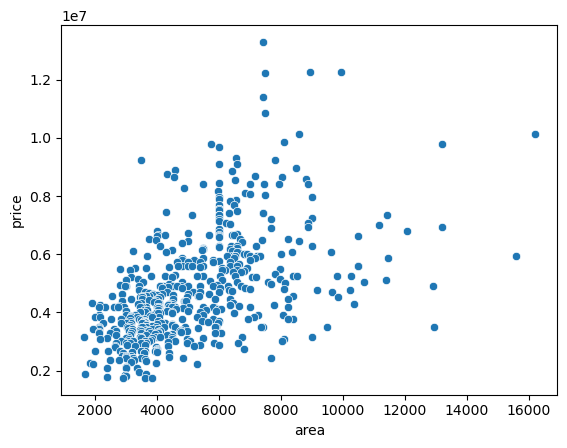

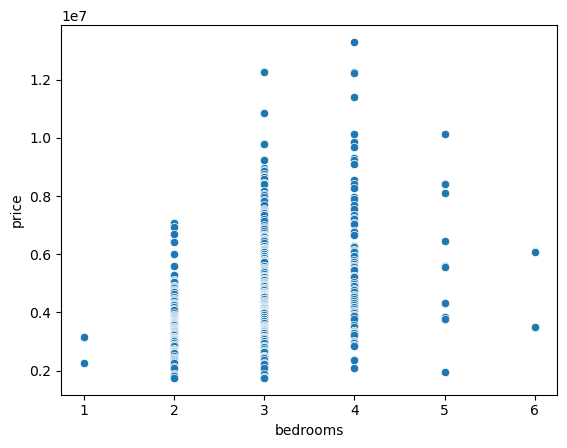

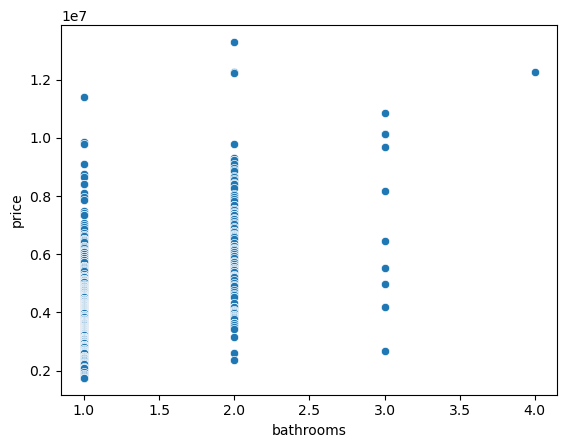

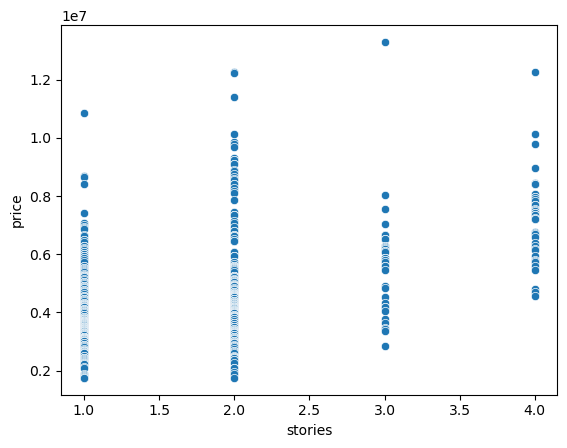

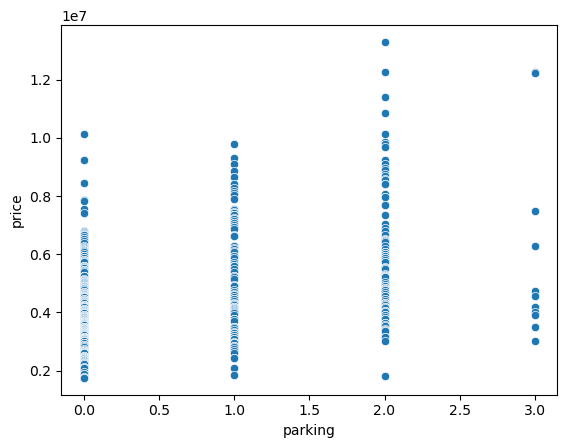

In [7]:
# basic EDA on numerical variables
for var in numerical_vars:
    if var != 'price':
        sns.scatterplot(data, x=var, y='price')
        plt.show()

In [8]:
# handle binary variables
for var in categorical_vars:
    if var != 'furnishingstatus':
        data[var] = data[var].map({'no': 0, 'yes': 1})

In [9]:
categorical_vars = data.select_dtypes(include='object').columns

In [10]:
# handle categorical variables
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True, dtype='int64')

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [67]:
# split data into train and test
train_data, test_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=42)
train_data.shape, test_data.shape

((381, 14), (164, 14))

In [13]:
# rescale the data
scaler = MinMaxScaler()
train_data[numerical_vars] = scaler.fit_transform(train_data[numerical_vars])
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])

In [68]:
train_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,4.762406e+06,5128.401575,2.958005,1.262467,1.782152,0.863517,0.186352,0.359580,0.052493,0.317585,0.669291,0.236220,0.427822,0.309711
std,1.774777e+06,2177.317846,0.752763,0.475044,0.862857,0.343752,0.389902,0.480508,0.223313,0.466149,0.837180,0.425318,0.495413,0.462983
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.382000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6325.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.225000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [15]:
test_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.288264,0.244122,0.396341,0.113821,0.286585,0.847561,0.158537,0.329268,0.030488,0.310976,0.250000,0.231707,0.390244,0.365854
std,0.198242,0.148394,0.140939,0.186230,0.292807,0.360547,0.366362,0.471387,0.172452,0.464311,0.305315,0.423215,0.489299,0.483144
min,0.000000,0.003436,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149167,0.127835,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240000,0.229897,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.390000,0.329897,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.416667,0.000000,1.000000,1.000000
max,1.100000,0.793814,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# create X & y from train and test data
X_train = train_data.drop(columns='price')
y_train = train_data['price']

X_test = test_data.drop(columns='price')
y_test = test_data['price']

In [70]:
# define K-folds
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
# define hyperparameters
params = {
            'max_depth': [2,3,5,7,11], 
            'min_samples_leaf': [5,6,7,8,9,10],
            'min_samples_split': [10,11,12,13,14]
         }

In [88]:
# define CV
cv = GridSearchCV(DecisionTreeRegressor(), param_grid=params, scoring='r2', 
                  n_jobs=-1, 
                  cv=folds, 
                  return_train_score=True)

In [89]:
# cross validation on train data
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 11],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14]},
             return_train_score=True, scoring='r2')

In [90]:
cv.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12}

In [194]:
# decision tree with best estimator
dt = DecisionTreeRegressor(max_depth=7,
                           min_samples_leaf=5,
                          min_samples_split=12)

In [195]:
# train the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=12)

In [196]:
# evaluation on train set
y_train_pred = dt.predict(X_train)
r2_score(y_train, y_train_pred)

0.7541842249930659

In [197]:
# evaluation on test set
y_test_pred = dt.predict(X_test)
r2_score(y_test, y_test_pred)

0.4324650947569202

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
y_train_pred_lr = lr.predict(X_train)
r2_score(y_train, y_train_pred_lr)

0.6931989807027313

In [98]:
y_test_pred_lr = lr.predict(X_test)
r2_score(y_test, y_test_pred_lr)

0.6463350878895877